In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import random
from urllib.request import urlretrieve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
DATASET_DIR = '/content/drive/MyDrive/dataset/research/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data preprocessing

In [ ]:
# Load data
users_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
movie_cols = ['movie_id', 'title', 'release_date', 'video_release_date',
              'imdb_url', 'genre_unknown', 'Action', 'Adventure', 'Animation',
              'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
              'Thriller', 'War', 'Western']
rating_cols = ['user_id', 'movie_id', 'rating', 'timestamp']

# Features
user_data = pd.read_csv(DATASET_DIR+'u.user', sep='|', names=users_cols)
movie_data = pd.read_csv(DATASET_DIR+'u.item', sep='|', names=movie_cols, encoding='latin')

rating_data = pd.read_csv(DATASET_DIR+'u1.base', sep='\t', names=rating_cols)

In [ ]:
test_rating_data = pd.read_csv(DATASET_DIR+'u1.test', sep='\t', names=rating_cols)

In [ ]:
# 평점 3점 이상만 watch로 간주
rating_data = rating_data.loc[(rating_data['rating'].isin([3,4,5]))]
rating_data.drop(['rating', 'timestamp'],axis=1,inplace=True)

In [ ]:
# search data 임의로 생성
search_data = rating_data.iloc[lambda x: x.index % 20 == 0]
search_data.rename(columns = {'user_id':'user_id','movie_id':'search_hist'},inplace=True)
search_dataset = search_data.groupby('user_id')['search_hist'].apply(list).reset_index()

<ipython-input-274-edf21664751d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  search_data.rename(columns = {'user_id':'user_id','movie_id':'search_hist'},inplace=True)


In [ ]:
search_dataset = search_data.groupby('user_id')['search_hist'].apply(list).reset_index()

In [ ]:
search_dataset

,user_id,search_hist
0,1,"[1, 30, 66, 115, 192, 240]"
1,2,"[111, 288]"
2,5,"[50, 186, 408, 447]"
3,6,"[79, 192, 303, 507]"
4,7,"[11, 77, 164, 216, 357, 434, 507, 565, 594, 62..."
...,...,...
860,939,"[127, 424, 1051]"
861,940,"[98, 193, 300, 436, 708]"
862,941,[258]
863,942,"[117, 282, 479, 689]"


In [ ]:
# example_age 추가
movie_data['example_age'] = (pd.to_datetime("now") - pd.to_datetime(movie_data['release_date']))\
            /np.timedelta64(1,'D')

movie_data

<ipython-input-277-0e0bba7e08d0>:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  movie_data['example_age'] = (pd.to_datetime("now") - pd.to_datetime(movie_data['release_date']))\


,movie_id,title,release_date,video_release_date,imdb_url,genre_unknown,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,example_age
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,10628.414464
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,10628.414464
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,10628.414464
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,10628.414464
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,10628.414464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9496.414464
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,9496.414464
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,9532.414464
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10993.414464


In [ ]:
watch_lowerbound = 20
watch_per_user = 10
negative_sample_num = 30

# train dataset 생성
train_dataset = pd.merge(user_data[['user_id','age','sex']], rating_data[['user_id','movie_id']], on='user_id')
train_dataset = pd.merge(train_dataset, search_dataset, on="user_id")

# 시청 수 적은 user 제거
train_dataset = train_dataset.groupby('user_id', group_keys=False).apply(
    lambda x : x.sample(n=watch_lowerbound).reset_index(drop=True)
    if len(x) >= watch_lowerbound
    else x.reset_index(drop=True))

# 시청한 movie 10개만 남김
train_dataset['watched_movies'] = train_dataset['user_id'].apply(
    lambda x : rating_data[rating_data.user_id == x]['movie_id'].sample(n=watch_per_user).tolist()
    if len(rating_data[rating_data.user_id == x]['movie_id'])>= watch_per_user
    else rating_data[rating_data.user_id == x]['movie_id'].tolist())

In [ ]:
#  Negative sampling
total_movie_num = movie_data.shape[0]

def create_negative_sample(row, total_movie_num):
    all_movie_ids = set(range(total_movie_num))
    positive_set = set(row['watched_movies'])
    negative_set = list(all_movie_ids - positive_set)
    negative_sample = random.sample(negative_set, min(len(negative_set), 30))
    return negative_sample

train_dataset['negative_sample'] = train_dataset.apply(create_negative_sample, axis=1, total_movie_num=movie_data.shape[0])

In [ ]:
# Shuffle
train_dataset = train_dataset.sample(frac=1).reset_index(drop=True)
train_dataset.head()

,user_id,age,sex,movie_id,search_hist,watched_movies,negative_sample
0,29,41,M,286,[1019],"[268, 264, 312, 300, 79, 661, 180, 306, 182, 1...","[748, 673, 1449, 654, 481, 452, 0, 1569, 25, 5..."
1,888,41,M,514,[644],"[100, 762, 153, 202, 792, 869, 514, 274, 644, ...","[402, 1071, 345, 964, 408, 1256, 1293, 1532, 2..."
2,472,24,M,419,"[2, 62, 97, 161, 210, 252, 365, 403, 475, 576,...","[62, 895, 250, 755, 496, 768, 1036, 12, 386, 41]","[899, 643, 361, 403, 576, 873, 1619, 1375, 807..."
3,578,31,M,346,[323],"[313, 298, 323, 678, 245, 380, 346, 288, 294, ...","[988, 835, 853, 1317, 301, 818, 1160, 1187, 10..."
4,63,31,M,676,"[10, 286]","[15, 475, 262, 321, 283, 1012, 284, 258, 79, 14]","[1303, 67, 616, 633, 1615, 1393, 463, 1091, 14..."


In [ ]:
# Dataframe to array
# Model에 넣을 수 있게 같은 크기 vector로 만들어야함
temp_1 = train_dataset['movie_id'].to_numpy().reshape(-1,1)
temp_2 = np.array(train_dataset['negative_sample'].tolist())
sample_data = np.append(temp_1, temp_2, axis=-1)

watched_movies_data = tf.keras.preprocessing.sequence.pad_sequences(train_dataset['watched_movies'])
searched_movies_data = tf.keras.preprocessing.sequence.pad_sequences(train_dataset['search_hist'])
gender_data = train_dataset['sex'].apply(lambda x: 0 if x == 'M' else 1).to_numpy().reshape(-1,1)
age_data = train_dataset['age'].apply(lambda x: (x - train_dataset['age'].min())/(train_dataset['age'].max() - train_dataset['age'].min())).to_numpy().reshape(-1,1)

In [ ]:
print(sample_data.shape, watched_movies_data.shape, gender_data.shape, age_data.shape, searched_movies_data.shape)

(16605, 31) (16605, 10) (16605, 1) (16605, 1) (16605, 30)


# Candidate generation Traning without search data

In [ ]:
import tensorflow as tf

EMBEDDING_DIMS = 16 # 임베딩 크기
DENSE_UNITS = 64    # 은닉층 크기
MOVIE_NUM = movie_data['movie_id'].max()
LEARNING_RATE = 0.003
BATCH_SIZE = 10

#-------------------------#
# embedding average layer
class Avg_Embedding(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(Avg_Embedding, self).__init__(**kwargs)

    def call(self, input):
        return tf.reduce_mean(input, axis=1)

#-------------------------#
# Input layers
input_watched_movies = tf.keras.Input(shape=(None, ), name='watched_movies')
input_age = tf.keras.layers.Input(shape=(1), name='age')
input_gender = tf.keras.layers.Input(shape=(1), name='gender')
input_samples = tf.keras.Input(shape=(None, ), name='samples')

# Embedding layers (영화 기록을 임베딩 하기 위한 embedding layer, search data는 사용 안함)
features_embedding_layer = tf.keras.layers.Embedding(input_dim = MOVIE_NUM+1, output_dim = EMBEDDING_DIMS, mask_zero=True, name='features_embedding')
average_embedding_layer = Avg_Embedding(name='features_embedding_average')

# Dense layers
dense_1 = tf.keras.layers.Dense(DENSE_UNITS, activation='relu', name='dense_1')
dense_2 = tf.keras.layers.Dense(EMBEDDING_DIMS, activation='relu', name='dense_2')

#-------------------------#
# Model1 connection
watched_movies_embedding = features_embedding_layer(input_watched_movies)
sample_movies_embedding = features_embedding_layer(input_samples)

average_embedding = average_embedding_layer(watched_movies_embedding)
concat_features = tf.keras.layers.concatenate([average_embedding, input_age, input_gender], axis=1, name='concatenate_features')
dense_1_out = dense_1(concat_features)
dense_2_out = dense_2(dense_1_out)
#
dot_product = tf.keras.layers.dot([dense_2_out, sample_movies_embedding], axes=(1,2), name='dot_product')
output = tf.keras.layers.Activation('softmax', name = 'class_probabilities')(dot_product)

model1 = tf.keras.Model(inputs=[input_watched_movies, input_age, input_gender, input_samples], outputs=[output])
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='sparse_categorical_crossentropy', metrics=['acc'])

model1.summary()


Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 watched_movies (InputLayer  [(None, None)]               0         []                            
 )                                                                                                
                                                                                                  
 features_embedding (Embedd  (None, None, 16)             26928     ['watched_movies[0][0]',      
 ing)                                                                'samples[0][0]']             
                                                                                                  
 features_embedding_average  (None, 16)                   0         ['features_embedding[0][0]']  
  (Avg_Embedding)                                                                          

In [ ]:
history = model1.fit([watched_movies_data, age_data, gender_data, sample_data],
                    np.zeros(len(train_dataset),dtype=int),
                    batch_size=BATCH_SIZE,
                    epochs=50)

Epoch 1/50
1661/1661 [==============================] - 3s 2ms/step - loss: 2.5822 - acc: 0.2332
Epoch 2/50
1661/1661 [==============================] - 3s 2ms/step - loss: 2.2408 - acc: 0.2973
Epoch 3/50
1661/1661 [==============================] - 3s 2ms/step - loss: 2.1390 - acc: 0.3139
Epoch 4/50
1661/1661 [==============================] - 3s 2ms/step - loss: 2.0625 - acc: 0.3289
Epoch 5/50
1661/1661 [==============================] - 3s 2ms/step - loss: 1.9862 - acc: 0.3433
Epoch 6/50
1661/1661 [==============================] - 3s 2ms/step - loss: 1.9135 - acc: 0.3556
Epoch 7/50
1661/1661 [==============================] - 3s 2ms/step - loss: 1.8488 - acc: 0.3701
Epoch 8/50
1661/1661 [==============================] - 3s 2ms/step - loss: 1.7871 - acc: 0.3911
Epoch 9/50
1661/1661 [==============================] - 3s 2ms/step - loss: 1.7305 - acc: 0.3977
Epoch 10/50
1661/1661 [==============================] - 3s 2ms/step - loss: 1.6795 - acc: 0.4164
Epoch 11/50
1661/1661 [======

# Candidate generation Training with search data


In [ ]:
#-------------------------#
# Input layers
input_watched_movies = tf.keras.Input(shape=(None, ), name='watched_movies')
input_age = tf.keras.layers.Input(shape=(1), name='age')
input_gender = tf.keras.layers.Input(shape=(1), name='gender')
input_samples = tf.keras.Input(shape=(None, ), name='samples')
input_search = tf.keras.Input(shape=(None, ), name='search_hist')

# Embedding layers (영화 기록, 검색 기록을 임베딩 하기 위한 embedding layer)
features_embedding_layer = tf.keras.layers.Embedding(input_dim = MOVIE_NUM+1, output_dim = EMBEDDING_DIMS, mask_zero=True, name='features_embedding')
average_embedding_layer = Avg_Embedding(name='features_embedding_average')

# Dense layers
dense_1 = tf.keras.layers.Dense(DENSE_UNITS, activation='relu', name='dense_1')
dense_2 = tf.keras.layers.Dense(EMBEDDING_DIMS, activation='relu', name='dense_2')

#-------------------------#
# Model2 connection
watched_movies_embedding = features_embedding_layer(input_watched_movies)
sample_movies_embedding = features_embedding_layer(input_samples)
search_movies_embedding = features_embedding_layer(input_search)

average_embedding_watched = average_embedding_layer(watched_movies_embedding)
average_embedding_search = average_embedding_layer(search_movies_embedding)

concat_features = tf.keras.layers.concatenate([average_embedding_watched, average_embedding_search, input_age, input_gender], axis=1, name='concatenate_features')
dense_1_out = dense_1(concat_features)
dense_2_out = dense_2(dense_1_out)
#
dot_product = tf.keras.layers.dot([dense_2_out, sample_movies_embedding], axes=(1,2), name='dot_product')
output = tf.keras.layers.Activation('softmax', name = 'class_probabilities')(dot_product)

model2 = tf.keras.Model(inputs=[input_watched_movies, input_age, input_gender, input_samples, input_search], outputs=[output])
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='sparse_categorical_crossentropy', metrics=['acc'])

model2.summary()

Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 watched_movies (InputLayer  [(None, None)]               0         []                            
 )                                                                                                
                                                                                                  
 search_hist (InputLayer)    [(None, None)]               0         []                            
                                                                                                  
 features_embedding (Embedd  (None, None, 16)             26928     ['watched_movies[0][0]',      
 ing)                                                                'samples[0][0]',             
                                                                     'search_hist[0][0]']  

In [ ]:
history = model2.fit([watched_movies_data, age_data, gender_data, sample_data, searched_movies_data],
                    np.zeros(len(train_dataset), dtype=int),
                    batch_size=BATCH_SIZE,
                    epochs=50)

Epoch 1/50
1661/1661 [==============================] - 4s 2ms/step - loss: 2.5537 - acc: 0.2418
Epoch 2/50
1661/1661 [==============================] - 3s 2ms/step - loss: 2.2478 - acc: 0.2922
Epoch 3/50
1661/1661 [==============================] - 3s 2ms/step - loss: 2.1525 - acc: 0.3088
Epoch 4/50
1661/1661 [==============================] - 3s 2ms/step - loss: 2.0841 - acc: 0.3191
Epoch 5/50
1661/1661 [==============================] - 4s 2ms/step - loss: 2.0268 - acc: 0.3295
Epoch 6/50
1661/1661 [==============================] - 3s 2ms/step - loss: 1.9768 - acc: 0.3403
Epoch 7/50
1661/1661 [==============================] - 3s 2ms/step - loss: 1.9277 - acc: 0.3516
Epoch 8/50
1661/1661 [==============================] - 3s 2ms/step - loss: 1.8749 - acc: 0.3650
Epoch 9/50
1661/1661 [==============================] - 4s 2ms/step - loss: 1.8241 - acc: 0.3774
Epoch 10/50
1661/1661 [==============================] - 3s 2ms/step - loss: 1.7790 - acc: 0.3888
Epoch 11/50
1661/1661 [======

# Candidate generation result


In [ ]:
# Imput data generator
def input_data_gen(user_id):
    if len(rating_data[rating_data.user_id == user_id]) >= watch_per_user:
        watched_movies_data = rating_data[rating_data.user_id == user_id]['movie_id'].sample(n=watch_per_user).to_numpy().reshape(-1,watch_per_user)
    else:
        watched_movies_data = tf.keras.preprocessing.sequence.pad_sequences(rating_data[rating_data.user_id == user_id]['movie_id'].to_numpy().reshape(1,-1), maxlen=watch_per_user)

    if 'search_hist' in search_dataset.columns and user_id in search_dataset['user_id'].unique():
        searched_movies_data = tf.keras.preprocessing.sequence.pad_sequences(search_dataset[search_dataset.user_id == user_id]['search_hist'].tolist(), maxlen=watch_per_user)
    else:
        searched_movies_data = np.zeros((1, watch_per_user))

    age_data = user_data[user_data.user_id == user_id]['age'].apply(lambda x: (x - user_data['age'].min())/(user_data['age'].max() - user_data['age'].min())).to_numpy().reshape(-1,1)
    gender_data = user_data[user_data.user_id == user_id]['sex'].apply(lambda x : 0 if x=='M' else 1).to_numpy().reshape(-1,1)

    return [watched_movies_data, age_data, gender_data, searched_movies_data]

# user embedding vector
user_embedding_without = tf.keras.backend.function([model1.get_layer('watched_movies').input,
                                        model1.get_layer('age').input,
                                        model1.get_layer('gender').input], [model1.layers[-3].output])

user_embedding_search = tf.keras.backend.function([model2.get_layer('watched_movies').input,
                                        model2.get_layer('age').input,
                                        model2.get_layer('gender').input,
                                        model2.get_layer('search_hist').input], [model2.layers[-3].output])

# video embedding vector
embedding_table1 = model1.get_layer('features_embedding').get_weights()[0]
embedding_table2 = model2.get_layer('features_embedding').get_weights()[0]
print(embedding_table1.shape, embedding_table2.shape)

(1683, 16) (1683, 16)


In [ ]:
user = random.randrange(1,943)
top_N_size = 200

input_data = input_data_gen(user)

# embedding without search data
em_without = user_embedding_without(input_data[0:3])[0]
result_without = np.dot(em_without, embedding_table1.transpose())[0]
rank_without = sorted(range(len(result_without)), key=lambda k: result_without[k], reverse=True)

# embedding with search data
em_with = user_embedding_search(input_data)[0]
result = np.dot(em_with, embedding_table2.transpose())[0]
rank = sorted(range(len(result)), key=lambda k: result[k], reverse=True)

print(f"Movie Recommendation without search data for user {user} (movie_ID): {rank_without[:10]}")
print(f"Movie Recommendation with search data for user {user} (movie_ID): {rank[:10]}")

Movie Recommendation without search data for user 313 (movie_ID): [1682, 382, 433, 213, 507, 207, 509, 234, 135, 194]
Movie Recommendation with search data for user 313 (movie_ID): [430, 492, 202, 647, 173, 174, 81, 28, 82, 135]


In [ ]:
# mean average precision
map_list_search = []
map_list_without = []
x_axis = []
ran_list = []

for top_N in range(1, top_N_size+2):
    true_positive_without = test_rating_data[(test_rating_data.user_id == user) & (test_rating_data.movie_id.isin(rank_without[:top_N]))]
    true_positive_search = test_rating_data[(test_rating_data.user_id == user) & (test_rating_data.movie_id.isin(rank[:top_N]))]

    random_user = np.random.choice(len(movie_data), top_N)
    random_positive = test_rating_data[(test_rating_data.user_id == user) & (test_rating_data.movie_id.isin(random_user))]

    if top_N % 10 == 0:
        print(f'top N  = {top_N} -------------------')

        print(f'model without search  = Rank {top_N} Precision : {len(true_positive_without)/top_N} ({len(true_positive_without)}/{top_N})')
        print(f'model with search     = Rank {top_N} Precision : {len(true_positive_search)/top_N} ({len(true_positive_search)}/{top_N})')
        print(f'random                = Rank {top_N} Precision : {len(random_positive)/top_N} ({len(random_positive)}/{top_N})\n')

    map_list_without.append(len(true_positive_without)/top_N)
    map_list_search.append(len(true_positive_search)/top_N)
    ran_list.append(len(random_positive)/top_N)
    x_axis.append(top_N)


top N  = 10 -------------------
model without search  = Rank 10 Precision : 0.3 (3/10)
model with search     = Rank 10 Precision : 0.2 (2/10)
random                = Rank 10 Precision : 0.0 (0/10)

top N  = 20 -------------------
model without search  = Rank 20 Precision : 0.3 (6/20)
model with search     = Rank 20 Precision : 0.45 (9/20)
random                = Rank 20 Precision : 0.0 (0/20)

top N  = 30 -------------------
model without search  = Rank 30 Precision : 0.26666666666666666 (8/30)
model with search     = Rank 30 Precision : 0.36666666666666664 (11/30)
random                = Rank 30 Precision : 0.1 (3/30)

top N  = 40 -------------------
model without search  = Rank 40 Precision : 0.275 (11/40)
model with search     = Rank 40 Precision : 0.35 (14/40)
random                = Rank 40 Precision : 0.1 (4/40)

top N  = 50 -------------------
model without search  = Rank 50 Precision : 0.26 (13/50)
model with search     = Rank 50 Precision : 0.32 (16/50)
random                =

<function matplotlib.pyplot.show(close=None, block=None)>

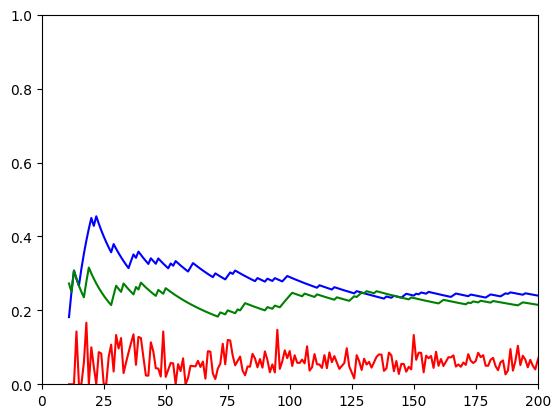

In [ ]:
plt.plot(x_axis[10:],map_list_search[10:], color='blue')
plt.plot(x_axis[10:],map_list_without[10:], color='green')
plt.plot(x_axis[10:], ran_list[10:], color='red')
plt.xlim(0,200)
plt.ylim(0,1)
plt.show

# Network depth를 다르게 하여 측정

In [ ]:
#-------------------------#
# Input layers
input_watched_movies = tf.keras.Input(shape=(None, ), name='watched_movies')
input_age = tf.keras.layers.Input(shape=(1), name='age')
input_gender = tf.keras.layers.Input(shape=(1), name='gender')
input_samples = tf.keras.Input(shape=(None, ), name='samples')
input_search = tf.keras.Input(shape=(None, ), name='search_hist')

# Embedding layers
features_embedding_layer = tf.keras.layers.Embedding(input_dim = MOVIE_NUM+1, output_dim = EMBEDDING_DIMS, mask_zero=True, name='features_embedding')
average_embedding_layer = Avg_Embedding(name='features_embedding_average')

# Dense layers
dense_1 = tf.keras.layers.Dense(DENSE_UNITS, activation='relu', name='dense_1')
dense_2 = tf.keras.layers.Dense(DENSE_UNITS/2, activation='relu', name='dense_2')
dense_3 = tf.keras.layers.Dense(EMBEDDING_DIMS, activation='relu', name='dense_3')

#-------------------------#
# Model connection
watched_movies_embedding = features_embedding_layer(input_watched_movies)
sample_movies_embedding = features_embedding_layer(input_samples)
search_movies_embedding = features_embedding_layer(input_search)

average_embedding_watched = average_embedding_layer(watched_movies_embedding)
average_embedding_search = average_embedding_layer(search_movies_embedding)

concat_features = tf.keras.layers.concatenate([average_embedding_watched, average_embedding_search, input_age, input_gender], axis=1, name='concatenate_features')
dense_1_out = dense_1(concat_features)
dense_2_out = dense_2(dense_1_out)
dense_3_out = dense_3(dense_2_out) # 추가: dense_3를 연결

dot_product = tf.keras.layers.dot([dense_3_out, sample_movies_embedding], axes=(1,2), name='dot_product')
output = tf.keras.layers.Activation('softmax', name='class_probabilities')(dot_product)

model3 = tf.keras.Model(inputs=[input_watched_movies, input_age, input_gender, input_samples, input_search], outputs=[output])
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='sparse_categorical_crossentropy', metrics=['acc'])

model3.summary()


In [ ]:
history = model3.fit([watched_movies_data, age_data, gender_data, sample_data, searched_movies_data],
                    np.zeros(len(train_dataset), dtype=int),
                    batch_size=BATCH_SIZE,
                    epochs=50)

In [ ]:
import tensorflow as tf

# 기존 설정
EMBEDDING_DIMS = 16 # 임베딩 크기
DENSE_UNITS = 64    # 은닉층 크기
MOVIE_NUM = movie_data['movie_id'].max()
LEARNING_RATE = 0.003

#-------------------------#
# embedding average layer
class Avg_Embedding(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(Avg_Embedding, self).__init__(**kwargs)

    def call(self, input):
        return tf.reduce_mean(input, axis=1)

#-------------------------#
# Input layers
input_watched_movies = tf.keras.Input(shape=(None, ), name='watched_movies')
input_age = tf.keras.layers.Input(shape=(1), name='age')
input_gender = tf.keras.layers.Input(shape=(1), name='gender')
input_samples = tf.keras.Input(shape=(None, ), name='samples')
input_search = tf.keras.Input(shape=(None, ), name='search_hist')

# Embedding layers
features_embedding_layer = tf.keras.layers.Embedding(input_dim = MOVIE_NUM+1, output_dim = EMBEDDING_DIMS, mask_zero=True, name='features_embedding')
average_embedding_layer = Avg_Embedding(name='features_embedding_average')

# Dense layers
dense_1 = tf.keras.layers.Dense(DENSE_UNITS, activation='relu', name='dense_1')
dense_2 = tf.keras.layers.Dense(DENSE_UNITS/2, activation='relu', name='dense_2')
dense_3 = tf.keras.layers.Dense(DENSE_UNITS/4, activation='relu', name='dense_3')  # 수정: dense_3의 유닛 수 유지
dense_4 = tf.keras.layers.Dense(EMBEDDING_DIMS, activation='relu', name='dense_4')  # 추가: 새로운 4번째 Dense 레이어

#-------------------------#
# Model connection
watched_movies_embedding = features_embedding_layer(input_watched_movies)
sample_movies_embedding = features_embedding_layer(input_samples)
search_movies_embedding = features_embedding_layer(input_search)

average_embedding_watched = average_embedding_layer(watched_movies_embedding)
average_embedding_search = average_embedding_layer(search_movies_embedding)

concat_features = tf.keras.layers.concatenate([average_embedding_watched, average_embedding_search, input_age, input_gender], axis=1, name='concatenate_features')
dense_1_out = dense_1(concat_features)
dense_2_out = dense_2(dense_1_out)
dense_3_out = dense_3(dense_2_out)
dense_4_out = dense_4(dense_3_out)

dot_product = tf.keras.layers.dot([dense_4_out, sample_movies_embedding], axes=(1,2), name='dot_product')
output = tf.keras.layers.Activation('softmax', name='class_probabilities')(dot_product)

model4 = tf.keras.Model(inputs=[input_watched_movies, input_age, input_gender, input_samples, input_search], outputs=[output])
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='sparse_categorical_crossentropy', metrics=['acc'])

model4.summary()

In [ ]:
history = model4.fit([watched_movies_data, age_data, gender_data, sample_data, searched_movies_data],
                    np.zeros(len(train_dataset), dtype=int),
                    batch_size=BATCH_SIZE,
                    epochs=50)

In [ ]:
# user embedding vector
user_embedding_3 = tf.keras.backend.function([model3.get_layer('watched_movies').input,
                                        model3.get_layer('age').input,
                                        model3.get_layer('gender').input,
                                        model3.get_layer('search_hist').input], [model3.layers[-3].output])

user_embedding_4 = tf.keras.backend.function([model4.get_layer('watched_movies').input,
                                        model4.get_layer('age').input,
                                        model4.get_layer('gender').input,
                                        model4.get_layer('search_hist').input], [model4.layers[-3].output])

# video embedding vector
embedding_table3 = model3.get_layer('features_embedding').get_weights()[0]
embedding_table4 = model4.get_layer('features_embedding').get_weights()[0]

In [ ]:
# Each for model 3 and 4
em_3 = user_embedding_3(input_data)[0]
result_3 = np.dot(em_3, embedding_table3.transpose())[0]
rank_3 = sorted(range(len(result_3)), key=lambda k: result_3[k], reverse=True)

em_4 = user_embedding_4(input_data)[0]
result_4 = np.dot(em_4, embedding_table4.transpose())[0]
rank_4 = sorted(range(len(result_4)), key=lambda k: result_4[k], reverse=True)

print(f"Movie Recommendation without search data for user {user} (movie_ID): {rank_3[:10]}")
print(f"Movie Recommendation with search data for user {user} (movie_ID): {rank_4[:10]}")

In [ ]:
# mean average precision

for top_N in range(1, top_N_size+2):
    tp3 = test_rating_data[(test_rating_data.user_id == user) & (test_rating_data.movie_id.isin(rank_3[:top_N]))]
    tp4 = test_rating_data[(test_rating_data.user_id == user) & (test_rating_data.movie_id.isin(rank_4[:top_N]))]


    if top_N % 10 == 0:
        print(f'top N  = {top_N} -------------------')

        print(f'model without search  = Rank {top_N} Precision : {len(tp3)/top_N} ({len(tp3)}/{top_N})')
        print(f'model without search  = Rank {top_N} Precision : {len(tp4)/top_N} ({len(tp4)}/{top_N})\n')


    map_list_without.append(len(tp3)/top_N)
    map_list_search.append(len(tp4)/top_N)
    ran_list.append(len(random_positive)/top_N)
    x_axis.append(top_N)

pre_list = [true_positive_search/top_N, tp3/top_N, tp4/top_N]


In [ ]:
plt.plot([2,3,4], pre_list, color='blue')
plt.xlim(1,5)
plt.ylim(0,1)
plt.show

# Result
Ranking은 impression data를 통해 candidate사이의 점수를 매기는 것인데, impression 데이터를 구할 수 없어 구현하지 않았다. 다른 데이터라도 추가적으로 활용하여 구현할까 했지만, 이는 위의 candidate generation과 본질적으로 다를 바가 없다.  
Candidate generation만으로 학습한 결과,논문보다 조금 높은 수준의 map를 보였다. search data를 포함할 때 search data를 포함하지 않을 때보다 높은 성능을 보였다.   
  search data는 임의로 만들었으므로, 포함할 때는 논문보다 높은 성능이 나온 것이  이해가 가지만, 포함하지 않았을 때에 어떤 요인이 논문보다 좋은 성능을 보였는지는 잘 모르겠다. 그냥 데이터셋의 차이일 수도 있을 것 같다.

